In [32]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

wine_df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 数据标准化（Z-score标准化）
scaler_z = StandardScaler()
wine_df_scaled = pd.DataFrame(scaler_z.fit_transform(wine_df), columns=wine.feature_names)

# 数据归一化（Min-Max标准化）
scaler_mm = MinMaxScaler()
wine_df_normalized = pd.DataFrame(scaler_mm.fit_transform(wine_df), columns=wine.feature_names)



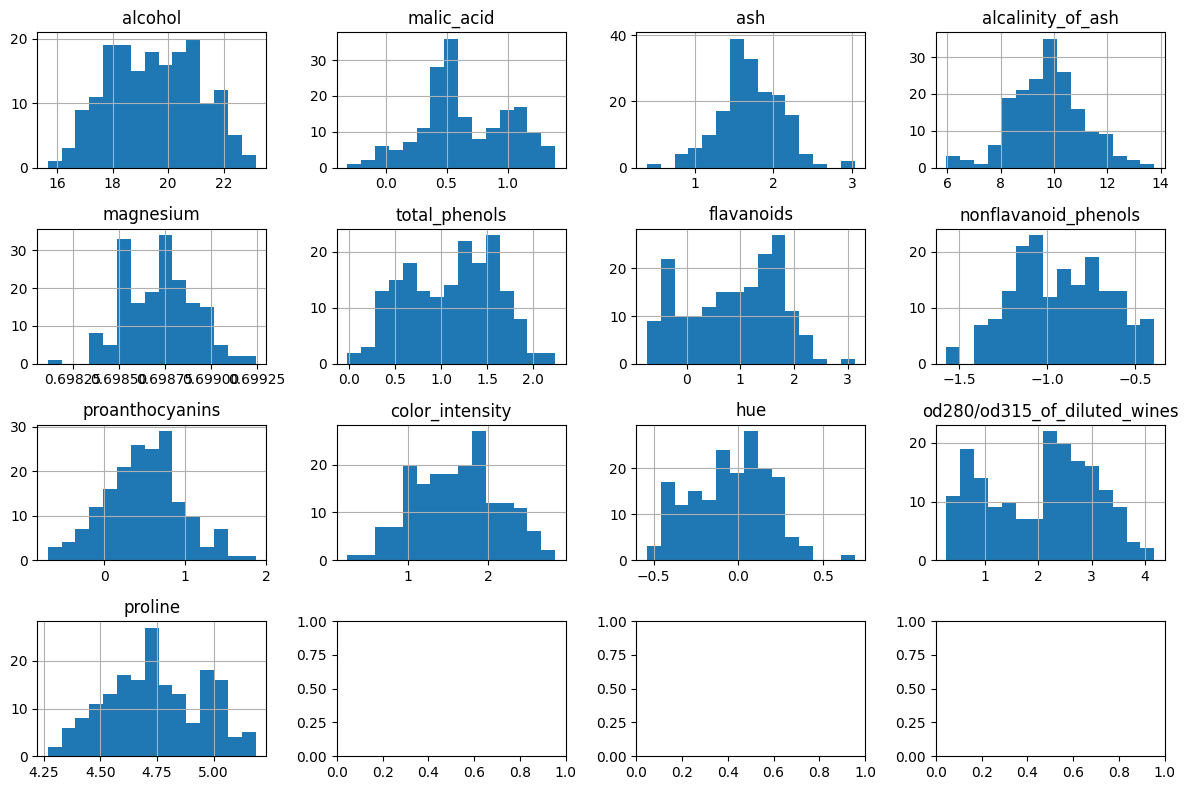

In [49]:
from scipy.stats import boxcox
import numpy as np

# 初始化Box-Cox变换后的数据存储
wine_df_boxcox = pd.DataFrame()

# 对每个特征进行Box-Cox变换
for feature in wine.feature_names:
    # Box-Cox变换要求数据都是正数，所以对于小于等于0的值，我们需要先进行加1处理
    data_positive = wine_df[feature] + (wine_df[feature] <= 0).astype(int)
    
    # 执行Box-Cox变换
    transformed_data, _ = boxcox(data_positive)
    
    # 存储变换后的数据
    wine_df_boxcox[feature] = transformed_data

# 绘制多图子图可视化各个特征
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
axes = axes.flatten()  # 将 axes 转换为 1 维数组，方便索引

# 绘制每个特征的直方图
for i, feature in enumerate(wine.feature_names):
    wine_df_boxcox[feature].hist(ax=axes[i], bins=15)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [53]:
# 分割测试和训练集
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 初始化模型参数
C = 0.01
random_state = 42
max_iter = 10_000

# 定义函数来训练模型并打印结果
def train_and_evaluate(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=C, random_state=random_state, max_iter=max_iter)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    return train_accuracy, test_accuracy

In [58]:

# 重新分割数据集
X_train, X_test, y_train, y_test = train_test_split(wine_df, wine.target, test_size=0.2, random_state=random_state)
X_train_normalized, _, y_train_normalized, _ = train_test_split(wine_df_normalized, wine.target, test_size=0.2, random_state=random_state)
X_train_scaled, _, y_train_scaled, _ = train_test_split(wine_df_scaled, wine.target, test_size=0.2, random_state=random_state)
X_train_boxcox, _, y_train_boxcox, _ = train_test_split(wine_df_boxcox, wine.target, test_size=0.2, random_state=random_state)

# 训练和评估原始数据
train_accuracy_original, test_accuracy_original = train_and_evaluate(X_train, X_test, y_train, y_test)

# 训练和评估归一化数据
train_accuracy_normalized, test_accuracy_normalized = train_and_evaluate(X_train_normalized, X_test, y_train_normalized, y_test)

# 训练和评估标准化数据
train_accuracy_standardized, test_accuracy_standardized = train_and_evaluate(X_train_scaled, X_test, y_train_standardized, y_test)

# 训练和评估Box-Cox变换后的数据
train_accuracy_boxcox, test_accuracy_boxcox = train_and_evaluate(X_train_boxcox, X_test, y_train_boxcox, y_test)

# 打印结果
print("原始数据 - 训练集准确度：{:.2%}, 测试集准确度：{:.2%}".format(train_accuracy_original, test_accuracy_original))
print("归一化数据 - 训练集准确度：{:.2%}, 测试集准确度：{:.2%}".format(train_accuracy_normalized, test_accuracy_normalized))
print("标准化数据 - 训练集准确度：{:.2%}, 测试集准确度：{:.2%}".format(train_accuracy_standardized, test_accuracy_standardized))
print("Box-Cox变换数据 - 训练集准确度：{:.2%}, 测试集准确度：{:.2%}".format(train_accuracy_boxcox, test_accuracy_boxcox))

原始数据 - 训练集准确度：94.37%, 测试集准确度：100.00%
归一化数据 - 训练集准确度：42.25%, 测试集准确度：38.89%
标准化数据 - 训练集准确度：99.30%, 测试集准确度：38.89%
Box-Cox变换数据 - 训练集准确度：93.66%, 测试集准确度：38.89%


In [52]:
from sklearn.metrics import classification_report
Y_pred = clf.predict(Xtest)
print(classification_report(Ytest,Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36




这里可以看到做数据处理后的效果并不好

In [65]:
wine = load_wine()
x=wine.data # 形状(569, 30)   
y=wine.target
print(x.shape,y.shape)

(178, 13) (178,)


In [67]:
features_mean = [x.mean(axis=0)] # 各列的均值     
features_var = [x.var(axis=0)]    
features_scale =[x.max(axis=0)-x.min(axis=0)]   

df = pd.DataFrame({'特征均值':[np.min(features_mean),np.max(features_mean)],
                   '特征方差':[np.min(features_var),np.max(features_var)],
                   '特征区间范围':[np.min(features_scale),np.max(features_scale)]}, index=['最小','最大'])
print(df)  

          特征均值          特征方差   特征区间范围
最小    0.361854      0.015402     0.53
最大  746.893258  98609.600966  1402.00


In [79]:
# 数据规范化预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# 进行训练集和测试集的划分
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y, random_state=42)
# scaler = StandardScaler()
sclaer = MinMaxScaler()
Xtrain_new = scaler.fit_transform(X_train)
Xtest_new = scaler.transform(X_test)

# 用规范化后的训练集数据训练模型
from sklearn.linear_model import LogisticRegression

models = []
for i in [0.1, 0.5, 1, 2, 5, 10, 100]:
    logreg = LogisticRegression(C=i, max_iter=100).fit(Xtrain_new, y_train)
    print("C={}, 训练得分：{:.3f}".format(i, logreg.score(Xtrain_new, y_train)))
    print("C={}, 测试得分：{:.3f}\n".format(i, logreg.score(Xtest_new, y_test)))
    models.append((i, logreg))

C=0.1, 训练得分：0.992
C=0.1, 测试得分：1.000

C=0.5, 训练得分：1.000
C=0.5, 测试得分：1.000

C=1, 训练得分：1.000
C=1, 测试得分：1.000

C=2, 训练得分：1.000
C=2, 测试得分：0.978

C=5, 训练得分：1.000
C=5, 测试得分：0.978

C=10, 训练得分：1.000
C=10, 测试得分：0.978

C=100, 训练得分：1.000
C=100, 测试得分：0.978



选择C=1作为最优模型